Outlier:  ['Costa Rica' 'Mexico' 'Qatar' 'Kuwait' 'Suriname' 'Kosovo' 'Hong Kong'
 'Estonia' 'Vietnam' 'Kyrgyzstan' 'Nigeria' 'Pakistan' 'Zambia'
 'Somaliland region' 'Mozambique' 'Lesotho' 'Swaziland' 'Greece' 'Hungary'
 'Bangladesh' 'Iraq' 'South Africa' 'Ghana' 'India' 'Congo (Kinshasa)'
 'Sierra Leone' 'Armenia' 'Botswana' 'Georgia' 'Malawi' 'Sri Lanka'
 'Bulgaria' 'Egypt' 'Yemen' 'Angola' 'Congo (Brazzaville)' 'Gabon' 'Niger'
 'Cambodia' 'Madagascar' 'Central African Republic' 'Guinea' 'Afghanistan'
 'Benin' 'Syria' 'Burundi' 'Togo'] 

Cluster 1:  ['Switzerland' 'Iceland' 'Denmark' 'Norway' 'Canada' 'Finland'
 'Netherlands' 'Sweden' 'New Zealand' 'Australia' 'Israel' 'Austria'
 'United States' 'Brazil' 'Luxembourg' 'Ireland' 'Belgium'
 'United Arab Emirates' 'United Kingdom' 'Oman' 'Venezuela' 'Singapore'
 'Panama' 'Germany' 'Chile' 'France' 'Argentina' 'Czech Republic'
 'Uruguay' 'Colombia' 'Thailand' 'Saudi Arabia' 'Spain' 'Malta' 'Taiwan'] 

Cluster 2:  ['Trinidad and Tobago' '

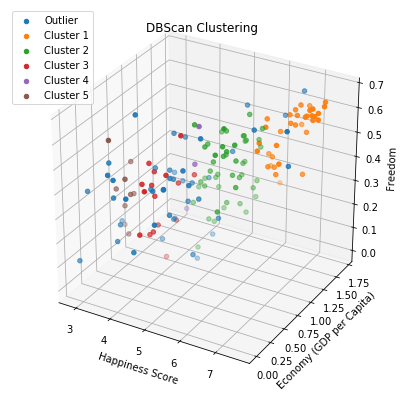

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from mpl_toolkits import mplot3d


dataset = pd.read_csv('happiness_index.csv')
x = dataset[['Happiness Score', 'Economy (GDP per Capita)', 
    'Family', 'Health (Life Expectancy)', 'Freedom']].values

# applying dbscan to the dataset / receiving
# cluster-classification for every row
dbscan = DBSCAN(eps=0.3, min_samples = 3)
clusters = dbscan.fit_predict(x)


#print out countries under each cluster
for i in np.unique(clusters):
    label = 'Outlier' if i == -1 else 'Cluster ' + str(i + 1)
    country = dataset.iloc[clusters==i, 0]
    print(label + ': ', country.values, '\n')

#plot cluster
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')

for i in np.unique(clusters):
    label = 'Outlier' if i == -1 else 'Cluster ' + str(i + 1)
    rows_by_cluster = x[clusters == i]
    ax.scatter3D(rows_by_cluster[:,0], rows_by_cluster[:,1],
             rows_by_cluster[:,4], label=label)

ax.set_xlabel(dataset.columns[1])
ax.set_ylabel(dataset.columns[3])
ax.set_zlabel(dataset.columns[6])
plt.title("DBScan Clustering")
plt.legend()
plt.show()
